In [1]:
# from statsmodels.stats import outliers_influence

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import missingno

In [5]:
df = pd.read_excel("ACS Data Color Coding.xlsx",
                   sheet_name='acs2015_census_tract_data',usecols=[])

### Made sense to set the CensusTract as the Index

In [6]:
df.set_index('CensusTract', inplace=True)

### Snapshot of the original data

In [7]:
df.head()

,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
CensusTract,,,,,,,,,,,,,,,,,,,,,
1001020100,Alabama,Autauga,1948,940,1008,0.9,87.4,7.7,0.3,0.6,...,0.5,2.3,2.1,25.0,943,77.1,18.3,4.6,0.0,5.4
1001020200,Alabama,Autauga,2156,1059,1097,0.8,40.4,53.3,0.0,2.3,...,0.0,0.7,0.0,23.4,753,77.0,16.9,6.1,0.0,13.3
1001020300,Alabama,Autauga,2968,1364,1604,0.0,74.5,18.6,0.5,1.4,...,0.0,0.0,2.5,19.6,1373,64.1,23.6,12.3,0.0,6.2
1001020400,Alabama,Autauga,4423,2172,2251,10.5,82.8,3.7,1.6,0.0,...,0.0,2.6,1.6,25.3,1782,75.7,21.2,3.1,0.0,10.8
1001020500,Alabama,Autauga,10763,4922,5841,0.7,68.5,24.8,0.0,3.8,...,0.0,0.6,0.9,24.8,5037,67.1,27.6,5.3,0.0,4.2


### 74001 rows
- minimum of 72901 non-null values
- 36 columns
- mostly numeric except State and County (can be part of multi-index)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74001 entries, 1001020100 to 72153750602
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   State            74001 non-null  object 
 1   County           74001 non-null  object 
 2   TotalPop         74001 non-null  int64  
 3   Men              74001 non-null  int64  
 4   Women            74001 non-null  int64  
 5   Hispanic         73311 non-null  float64
 6   White            73311 non-null  float64
 7   Black            73311 non-null  float64
 8   Native           73311 non-null  float64
 9   Asian            73311 non-null  float64
 10  Pacific          73311 non-null  float64
 11  Citizen          74001 non-null  int64  
 12  Income           72901 non-null  float64
 13  IncomeErr        72901 non-null  float64
 14  IncomePerCap     73261 non-null  float64
 15  IncomePerCapErr  73261 non-null  float64
 16  Poverty          73166 non-null  float64
 1

### White lines in the following graphic show the missing values by row
### If many white lines in 1 row, many values are missing for that row

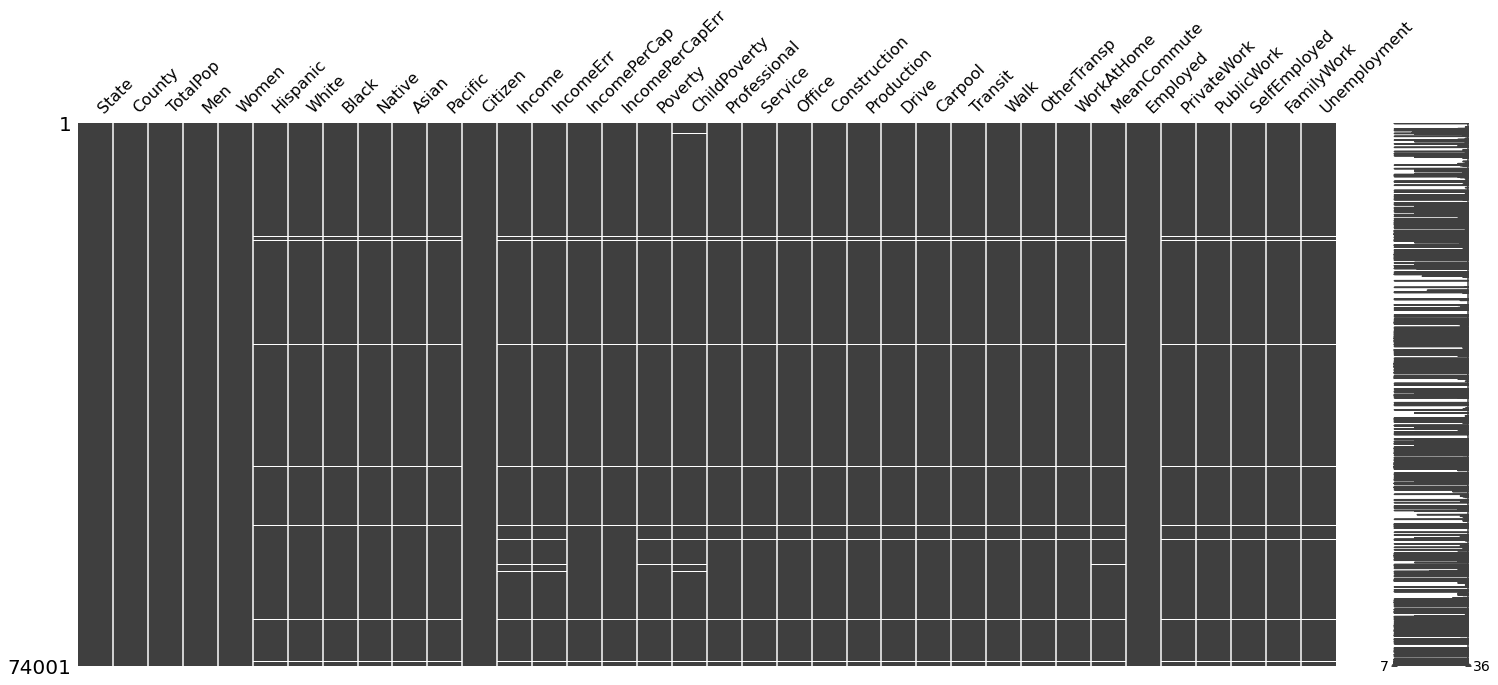

In [9]:
missingno.matrix(df);

### Shows the same point as the previous graphic
"if a missing value occurs in an attribute, how likely is a missing value in this other attribute"

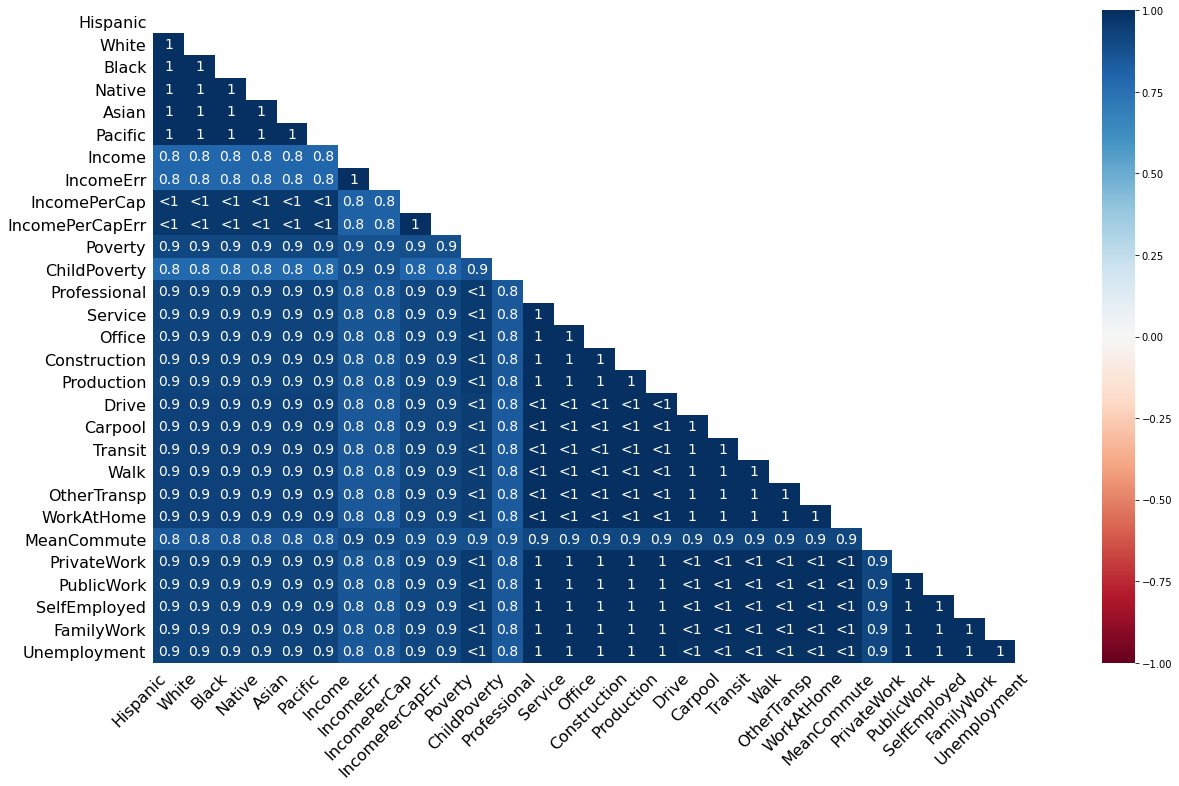

In [10]:
missingno.heatmap(df);

### Many missing values for Income come from Metropolitan areas

In [11]:
df.loc[df['Income'].isna(), ['State','County']].value_counts().nlargest(15)

State          County      
California     Los Angeles     41
New York       Queens          27
Hawaii         Hawaii          17
Florida        Miami-Dade      14
Arizona        Maricopa        13
New York       Kings           13
               New York        13
Puerto Rico    San Juan        13
Hawaii         Honolulu        13
Pennsylvania   Allegheny       12
Florida        Hillsborough    12
Massachusetts  Suffolk         12
Michigan       Wayne           10
Pennsylvania   Philadelphia    10
New York       Bronx           10
dtype: int64

### Given rows with missing Income values, what percent of the other data is missing
(Page 88)
- We could use regression to estimate the Income of the census tract (Option 6)
- Or we could use the median of the county (Option 5)
- Or just drop them (Option 1)

In [12]:
df.loc[df['Income'].isna()].isnull().mean().sort_values(ascending=False)

Income             1.000000
IncomeErr          1.000000
ChildPoverty       0.877273
MeanCommute        0.830909
Poverty            0.759091
Professional       0.731818
FamilyWork         0.731818
SelfEmployed       0.731818
PublicWork         0.731818
PrivateWork        0.731818
Production         0.731818
Construction       0.731818
Office             0.731818
Service            0.731818
Unemployment       0.728182
Transit            0.722727
Drive              0.722727
WorkAtHome         0.722727
OtherTransp        0.722727
Walk               0.722727
Carpool            0.722727
IncomePerCap       0.672727
IncomePerCapErr    0.672727
Black              0.627273
Native             0.627273
Asian              0.627273
Pacific            0.627273
White              0.627273
Hispanic           0.627273
County             0.000000
Citizen            0.000000
Employed           0.000000
Women              0.000000
Men                0.000000
TotalPop           0.000000
State              0

In [13]:
df.describe()

,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
count,74001.000000,74001.000000,74001.000000,73311.000000,73311.000000,73311.000000,73311.000000,73311.000000,73311.000000,74001.000000,...,73204.000000,73204.000000,73204.000000,73052.000000,74001.000000,73194.000000,73194.000000,73194.000000,73194.000000,73199.000000
mean,4325.591465,2127.648816,2197.942649,16.862810,62.032106,13.272581,0.727726,4.588253,0.145012,3043.079566,...,3.123340,1.891606,4.368093,25.667357,1983.907366,78.975238,14.621566,6.233814,0.169772,9.028663
std,2129.306903,1072.332031,1095.730931,22.940695,30.684152,21.762483,4.488340,8.794003,1.037354,1475.492946,...,5.881237,2.596198,3.904990,6.964881,1073.429808,8.345758,7.535786,4.042990,0.458227,5.955441
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2891.000000,1409.000000,1461.000000,2.400000,39.400000,0.700000,0.000000,0.200000,0.000000,2037.000000,...,0.400000,0.400000,1.800000,20.800000,1249.000000,74.600000,9.600000,3.500000,0.000000,5.100000
50%,4063.000000,1986.000000,2066.000000,7.000000,71.400000,3.700000,0.000000,1.400000,0.000000,2863.000000,...,1.400000,1.100000,3.500000,25.000000,1846.000000,80.100000,13.400000,5.500000,0.000000,7.700000
75%,5442.000000,2674.000000,2774.000000,20.400000,88.300000,14.400000,0.400000,4.800000,0.000000,3838.000000,...,3.500000,2.500000,5.900000,29.800000,2553.000000,84.600000,18.200000,8.100000,0.000000,11.400000
max,53812.000000,27962.000000,27250.000000,100.000000,100.000000,100.000000,100.000000,91.300000,84.700000,37416.000000,...,100.000000,100.000000,100.000000,80.000000,24075.000000,100.000000,100.000000,100.000000,26.500000,100.000000


### Over 3,000 counties if we want to combine census tracts
(It's best not to use Nearest Neighbors algorithms without location data.)

In [14]:
len(df.groupby(['State','County']).groups.keys())

3220

### Example County data

In [15]:
df.groupby(['State','County']).get_group(('Florida','Escambia'))

,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
CensusTract,,,,,,,,,,,,,,,,,,,,,
12033000100,Florida,Escambia,1429,707,722,1.5,52.3,35.1,0.3,3.1,...,2.9,8.2,1.5,16.6,748,81.1,13.6,5.2,0.0,13.3
12033000300,Florida,Escambia,2129,1170,959,6.5,53.1,34.2,0.2,0.0,...,0.0,3.9,6.0,23.2,1124,80.6,12.3,7.1,0.0,4.8
12033000400,Florida,Escambia,3394,1366,2028,2.9,12.9,82.9,0.0,0.3,...,0.9,0.0,8.4,19.9,1095,81.3,11.1,7.6,0.0,18.2
12033000500,Florida,Escambia,1376,636,740,1.7,64.4,30.8,0.0,0.9,...,0.5,0.9,12.3,15.4,650,76.2,13.5,9.4,0.9,6.3
12033000600,Florida,Escambia,1630,677,953,1.2,19.1,79.5,0.1,0.0,...,0.0,3.6,1.3,18.3,673,70.9,20.8,8.3,0.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12033003700,Florida,Escambia,4169,2081,2088,2.6,71.1,22.0,0.4,0.6,...,0.0,0.8,2.0,22.4,1786,82.3,14.8,3.0,0.0,7.6
12033003800,Florida,Escambia,4570,2385,2185,2.0,82.6,8.4,1.1,0.4,...,0.5,1.6,5.4,26.7,2101,71.3,15.0,13.3,0.4,9.0
12033003900,Florida,Escambia,4223,1835,2388,6.0,78.3,7.2,0.8,1.3,...,1.2,0.7,7.7,32.2,1776,72.8,16.8,10.4,0.0,6.1


### The following are just the descriptions of the attributes

In [16]:
df.loc[:,:'Citizen'].describe()

,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen
count,74001.000000,74001.000000,74001.000000,73311.000000,73311.000000,73311.000000,73311.000000,73311.000000,73311.000000,74001.000000
mean,4325.591465,2127.648816,2197.942649,16.862810,62.032106,13.272581,0.727726,4.588253,0.145012,3043.079566
std,2129.306903,1072.332031,1095.730931,22.940695,30.684152,21.762483,4.488340,8.794003,1.037354,1475.492946
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2891.000000,1409.000000,1461.000000,2.400000,39.400000,0.700000,0.000000,0.200000,0.000000,2037.000000
50%,4063.000000,1986.000000,2066.000000,7.000000,71.400000,3.700000,0.000000,1.400000,0.000000,2863.000000
75%,5442.000000,2674.000000,2774.000000,20.400000,88.300000,14.400000,0.400000,4.800000,0.000000,3838.000000
max,53812.000000,27962.000000,27250.000000,100.000000,100.000000,100.000000,100.000000,91.300000,84.700000,37416.000000


In [17]:
df.loc[:,'Income':'Office'].describe()

,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office
count,72901.000000,72901.000000,73261.000000,73261.000000,73166.000000,72883.000000,73194.000000,73194.000000,73194.000000
mean,57225.564862,9134.493848,28491.234299,3942.909229,16.958020,22.486827,34.798843,19.101381,23.951559
std,28663.331962,5920.336551,15047.068660,3023.027898,13.196518,19.190909,15.007075,8.279143,5.957279
min,2611.000000,390.000000,128.000000,85.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37683.000000,5317.000000,19123.000000,2312.000000,7.200000,7.000000,24.100000,13.400000,20.100000
50%,51094.000000,7732.000000,25344.000000,3127.000000,13.400000,17.800000,32.600000,17.900000,23.800000
75%,70117.000000,11258.000000,33894.000000,4537.000000,23.100000,33.800000,43.875000,23.600000,27.500000
max,248750.000000,123116.000000,254204.000000,134380.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [18]:
df.loc[:,'Construction':'Employed'].describe()

,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed
count,73194.000000,73194.000000,73204.000000,73204.000000,73204.000000,73204.000000,73204.000000,73204.000000,73052.000000,74001.000000
mean,9.292337,12.856005,75.533887,9.627468,5.456050,3.123340,1.891606,4.368093,25.667357,1983.907366
std,6.023290,7.671588,15.371620,5.367321,11.724287,5.881237,2.596198,3.904990,6.964881,1073.429808
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.200000,0.000000
25%,5.000000,7.100000,72.000000,6.000000,0.000000,0.400000,0.400000,1.800000,20.800000,1249.000000
50%,8.400000,11.800000,79.700000,8.800000,1.100000,1.400000,1.100000,3.500000,25.000000,1846.000000
75%,12.500000,17.400000,84.900000,12.300000,4.700000,3.500000,2.500000,5.900000,29.800000,2553.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,80.000000,24075.000000


In [19]:
df.loc[:,'PrivateWork':].describe()

,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
count,73194.000000,73194.000000,73194.000000,73194.000000,73199.000000
mean,78.975238,14.621566,6.233814,0.169772,9.028663
std,8.345758,7.535786,4.042990,0.458227,5.955441
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.600000,9.600000,3.500000,0.000000,5.100000
50%,80.100000,13.400000,5.500000,0.000000,7.700000
75%,84.600000,18.200000,8.100000,0.000000,11.400000
max,100.000000,100.000000,100.000000,26.500000,100.000000


### Noticed these 4 combine to near 100%

In [20]:
(df['PrivateWork'] + df['PublicWork'] + df['SelfEmployed'] + df['FamilyWork']).describe()

count    73194.000000
mean       100.000391
std          0.051625
min         99.900000
25%        100.000000
50%        100.000000
75%        100.000000
max        100.200000
dtype: float64

### Just decimal scaling like (3.12)

In [21]:
df['Hispanic']     = df['Hispanic'] / 100
df['White']        = df['White'] / 100
df['Black']        = df['Black'] / 100
df['Native']       = df['Native'] / 100
df['Asian']        = df['Asian'] / 100
df['Pacific']      = df['Pacific'] / 100
df['Poverty']      = df['Poverty'] / 100
df['ChildPoverty'] = df['ChildPoverty'] / 100
df['Professional'] = df['Professional'] / 100
df['Service']      = df['Service'] / 100
df['Office']       = df['Office'] / 100
df['Construction'] = df['Construction'] / 100
df['Production']   = df['Production'] / 100
df['Drive']        = df['Drive'] / 100
df['Carpool']      = df['Carpool'] / 100
df['Transit']      = df['Transit'] / 100
df['Walk']         = df['Walk'] / 100
df['OtherTransp']  = df['OtherTransp'] / 100
df['WorkAtHome']   = df['WorkAtHome'] / 100
df['PrivateWork']  = df['PrivateWork'] / 100
df['PublicWork']   = df['PublicWork'] / 100
df['SelfEmployed'] = df['SelfEmployed'] / 100
df['FamilyWork']   = df['FamilyWork'] / 100
df['Unemployment']   = df['Unemployment'] / 100

## Ideas for Attribute Reduction (by Esteban):
### 36 original attributes
1. Drop race demographic data: Hispanic, White, Black, Native, Asian, Pacific (36 - 6 = 30)
2. Drop sex demographic data: Men, Women (30 - 2 = 28)
3. Drop Income derivative data: IncomeErr, IncomePerCap, IncomePerCapErr, Poverty, ChildPoverty (28 - 5 = 23)
4. Drop TotalPop derivative data: Citizen, Unemployment, <strike>Employment</strike>, PrivateWork, PublicWork, SelfEmployed, FamilyWork (23 - 5 = 18)
5. Combine transportation: Car vs Other (18 + 2 - 6 = 14)
6. Drop MeanCommute (14 - 1 = 13)

Sorry, I have to disagree on the Employment figure.

### From here, we should convert all percentages to real figures before we filter down to the Southeast region <br />(to get down to 550 <= rows <=1500)

### Then we should drop the location data, (CensusTract, State, County), because we don't need it necessarily. Nice to have for insights, but they're ID and nominal attributes.

In [22]:
df.drop(['Hispanic',
         'White',
         'Black',
         'Native',
         'Asian',
         'Pacific',
         'Men',
         'Women',
         'IncomeErr',
         'IncomePerCap',
         'IncomePerCapErr',
         'Poverty',
         'ChildPoverty',
         'Citizen',
         'Unemployment',
         'PrivateWork',
         'PublicWork',
         'SelfEmployed',
         'FamilyWork',
         'MeanCommute'], 
        axis=1, 
        inplace=True)

In [23]:
df['Car'] = df['Drive'] + df['Carpool']
df['OtherTransport'] = df['Transit'] + df['Walk'] + df['OtherTransp'] + df['WorkAtHome']

In [24]:
df.drop(['Drive',
         'Carpool',
         'Transit',
         'Walk',
         'OtherTransp',
         'WorkAtHome'],
        axis=1,
        inplace=True)

### Checkpoint: I want to confirm I should multiply the percentages by Employed and not TotalPop

In [27]:
df['Professional']   = df['Professional']   * df['Employed']
df['Service']        = df['Service']        * df['Employed']
df['Office']         = df['Office']         * df['Employed']
df['Construction']   = df['Construction']   * df['Employed']
df['Production']     = df['Production']     * df['Employed']
df['Car']            = df['Car']            * df['Employed']
df['OtherTransport'] = df['OtherTransport'] * df['Employed']

In [28]:
df.head()

,State,County,TotalPop,Income,Professional,Service,Office,Construction,Production,Employed,Car,OtherTransport
CensusTract,,,,,,,,,,,,
1001020100,Alabama,Autauga,1948,61838.0,327.221,160.310,200.859,112.217,143.336,943,895.850,46.207
1001020200,Alabama,Autauga,2156,32303.0,167.919,185.991,161.895,70.782,165.660,753,748.482,5.271
1001020300,Alabama,Autauga,2968,44922.0,431.122,341.877,303.433,126.316,170.252,1373,1340.048,34.325
1001020400,Alabama,Autauga,4423,54329.0,481.140,370.656,481.140,155.034,292.248,1782,1705.374,74.844
1001020500,Alabama,Autauga,10763,51965.0,2498.352,715.254,916.734,105.777,795.846,5037,4961.445,75.555


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74001 entries, 1001020100 to 72153750602
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           74001 non-null  object 
 1   County          74001 non-null  object 
 2   TotalPop        74001 non-null  int64  
 3   Income          72901 non-null  float64
 4   Professional    73194 non-null  float64
 5   Service         73194 non-null  float64
 6   Office          73194 non-null  float64
 7   Construction    73194 non-null  float64
 8   Production      73194 non-null  float64
 9   Employed        74001 non-null  int64  
 10  Car             73204 non-null  float64
 11  OtherTransport  73204 non-null  float64
dtypes: float64(8), int64(2), object(2)
memory usage: 7.3+ MB
